In [151]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [123]:
directory = '~/PycharmProjects/tfm_hugopobil'
df = pd.read_csv(f'{directory}/data/tweets_nlp_modelling.csv')
btc_usd_grouped = pd.read_csv(f'{directory}/data/btc_usd_grouped.csv')
df.head()

,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-10-28,"Airdrop is live , dont be late sir :)\n\n\n\n\...",Airdrop live dont late sir Airdrop Airdrops Ai...,negative,0.550000,-0.081818,negative,True
1,2021-10-22,something Big is coming \n$KLV Klever 💜🌟\n\nBT...,something Big coming KLV Klever BTC ETH BNB TR...,negative,0.100000,0.000000,positive,False
2,2021-08-16,Easy money with \n\n bsc bnb BinanceSmartChain...,Easy money bsc bnb BinanceSmartChain binance g...,negative,0.833333,0.433333,neutral,False
3,2021-10-19,NanoDogecoin is the King👑of the BSC Blockchain...,NanoDogecoin King BSC Blockchain DeFi altcoins...,negative,0.733333,0.433333,neutral,False
4,2021-12-30,"Bitcoin News Roundup for June 17, 2020 cryptoc...",Bitcoin News Roundup June cryptocurrencies bit...,positive,0.000000,0.000000,positive,True


In [124]:
df['polarity'] = preprocessing.scale(df.polarity)

In [148]:
# df = df.drop(columns=['Unnamed: 0'])

In [132]:
df = df.set_index('date_clean')

In [133]:
df_agg = df.polarity.groupby(by=df.index).agg('mean')

In [134]:
df_agg = df_agg.to_frame()

In [135]:
df_agg['scale_polarity'] = preprocessing.scale(df_agg.polarity)
btc_usd_grouped['scale_adj_close'] = preprocessing.scale(btc_usd_grouped['Adj Close'])

In [136]:
df_agg

,polarity,scale_polarity
date_clean,,
2021-02-05,-0.193932,-0.829158
2021-02-06,-0.333432,-1.650626
2021-02-07,-0.327608,-1.616327
2021-02-08,-0.339000,-1.683411
2021-02-09,-0.036617,0.097209
...,...,...
2022-02-15,-0.332076,-1.642639
2022-02-16,-0.150850,-0.575464
2022-02-17,-0.071527,-0.108359


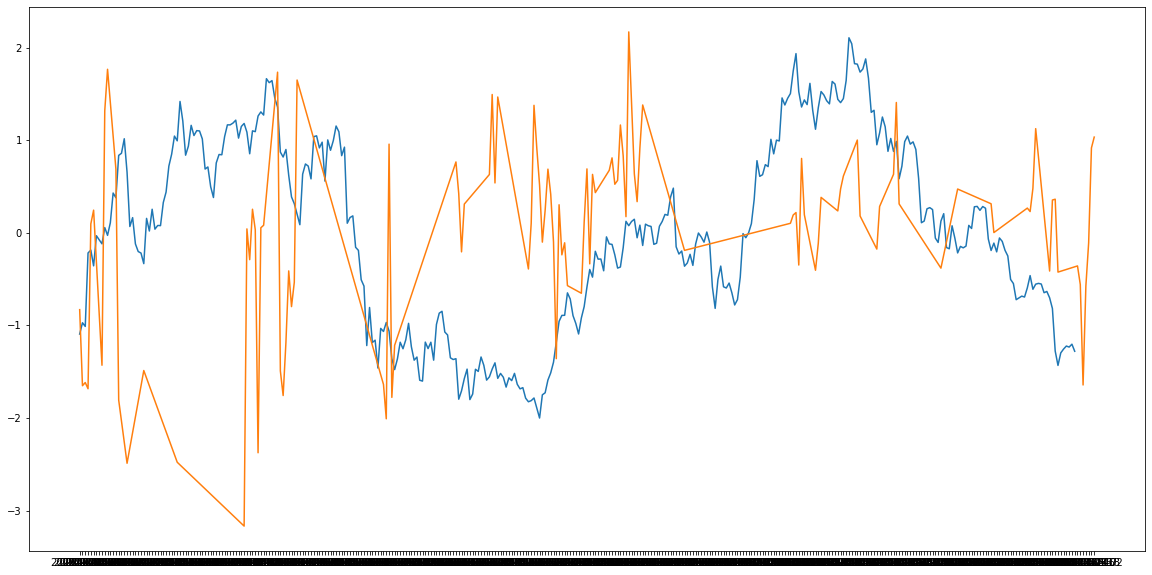

In [140]:
plt.plot(btc_usd_grouped.Date, btc_usd_grouped['scale_adj_close'], label='Bitcoin')
plt.plot(df_agg.index, df_agg.scale_polarity, label='Sentiment')

Correlation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

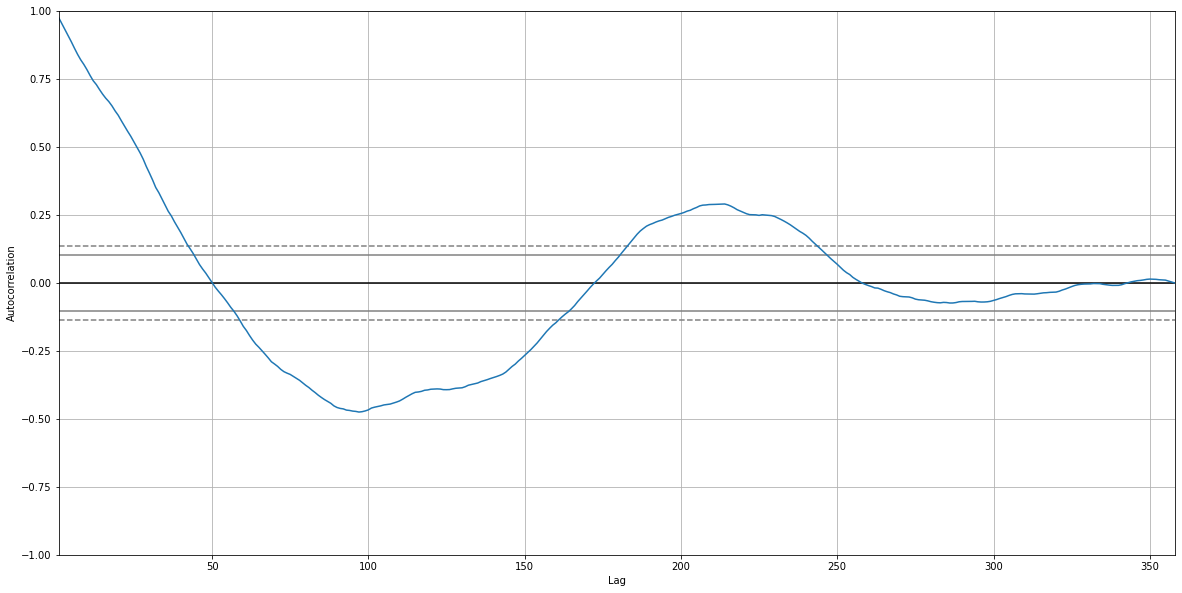

In [152]:
autocorrelation_plot(btc_usd_grouped['Adj Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

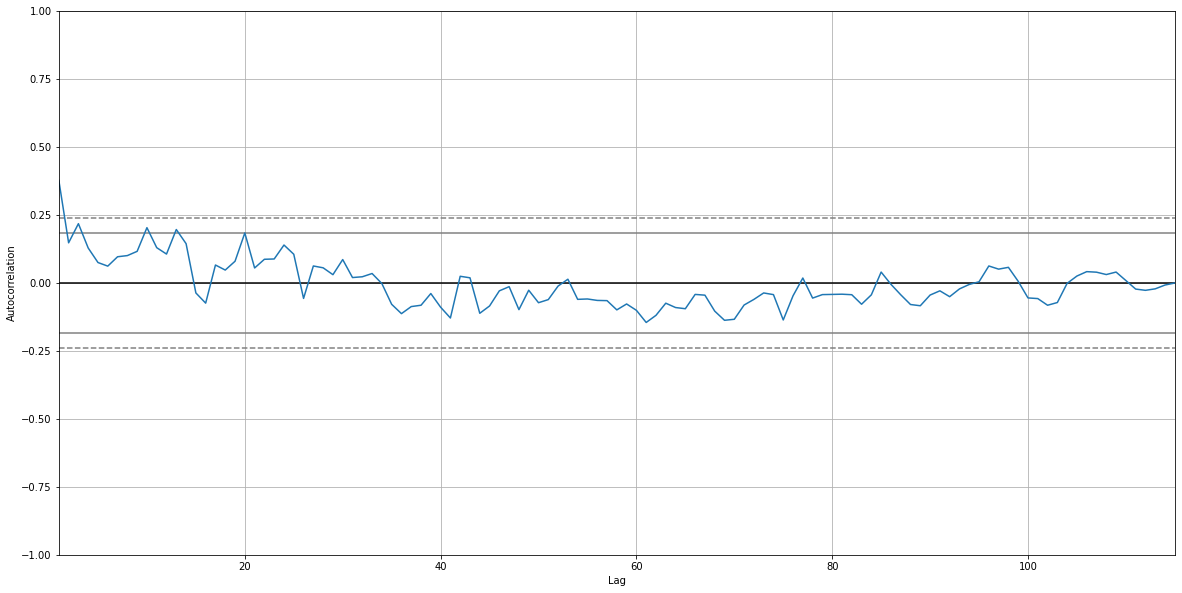

In [153]:
autocorrelation_plot(df_agg.polarity)